In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
from adjustText import adjust_text

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df = df[df["job_title_short"] == "Data Analyst"]
df_exploded = df.explode("job_skills")
skill_stats = df_exploded.groupby("job_skills").agg(
    skill_count=("job_skills", "count"),
    median_salary=("salary_year_avg", "median")
)

skill_stats = skill_stats.sort_values(by="skill_count", ascending=False).head(20)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


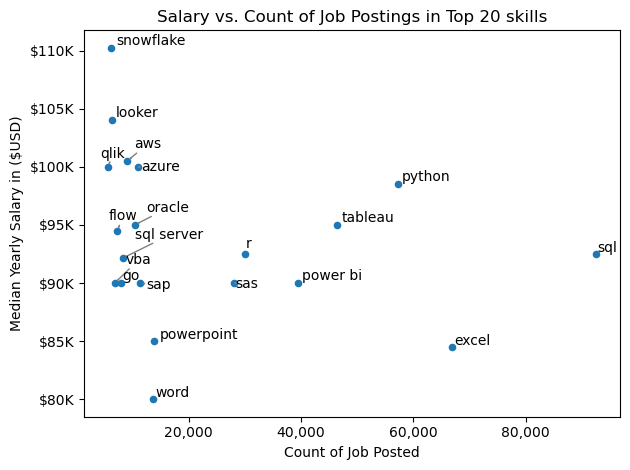

In [30]:

skill_stats.plot(kind="scatter", x="skill_count", y="median_salary")

texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], txt))  #iloc is used to access the column and row
    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="grey", lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x):,}"))

plt.title("Salary vs. Count of Job Postings in Top 20 skills")
plt.xlabel("Count of Job Posted")
plt.ylabel("Median Yearly Salary in ($USD)")
plt.tight_layout()
plt.show()

1. ax = plt.gca()
plt.gca() stands for "get current axis."
It grabs the part of the plot where the data is displayed (the x-axis and y-axis).
ax is now a shortcut to refer to the plot’s axes.
2. ax.yaxis.set_major_formatter(...)
This is used to change how the numbers on the y-axis are displayed.
set_major_formatter is a function that lets you define a custom format for the axis labels.
3. plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K")
This is where the magic happens! It defines how the y-axis numbers should be formatted.
plt.FuncFormatter is a tool that lets you create custom formatting rules.
The lambda function is a small, anonymous function that takes two inputs:
y: The original number on the y-axis (e.g., 110000).
pos: The position of the label (not used here, but required by the function).
Inside the lambda function:
int(y/1000) divides the number by 1000 and converts it to an integer (e.g., 110000 becomes 110).
f"${int(y/1000)}K" formats the number as a string with a $ sign and a K (e.g., $110K).